# Import libraries & uploading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

# Exploring the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
df.duplicated().sum()

0

In [6]:
nans=df.isna().sum().sort_values(ascending=False)
pct=nans*100/df.shape[0]
uniques=df.nunique()
noted=pd.concat([nans,pct,uniques,df.dtypes],axis=1)
noted.columns=['Null count','Null percentage','n_unique values','data_type']
noted

Null count  Null percentage  n_unique values  \
Pregnancies                        0              0.0               17   
Glucose                            0              0.0              136   
BloodPressure                      0              0.0               47   
SkinThickness                      0              0.0               51   
Insulin                            0              0.0              186   
BMI                                0              0.0              248   
DiabetesPedigreeFunction           0              0.0              517   
Age                                0              0.0               52   
Outcome                            0              0.0                2   

                         data_type  
Pregnancies                  int64  
Glucose                      int64  
BloodPressure                int64  
SkinThickness                int64  
Insulin                      int64  
BMI                        float64  
DiabetesPedigreeFunction   float64  
Age                          int64  
Outcome                      int64

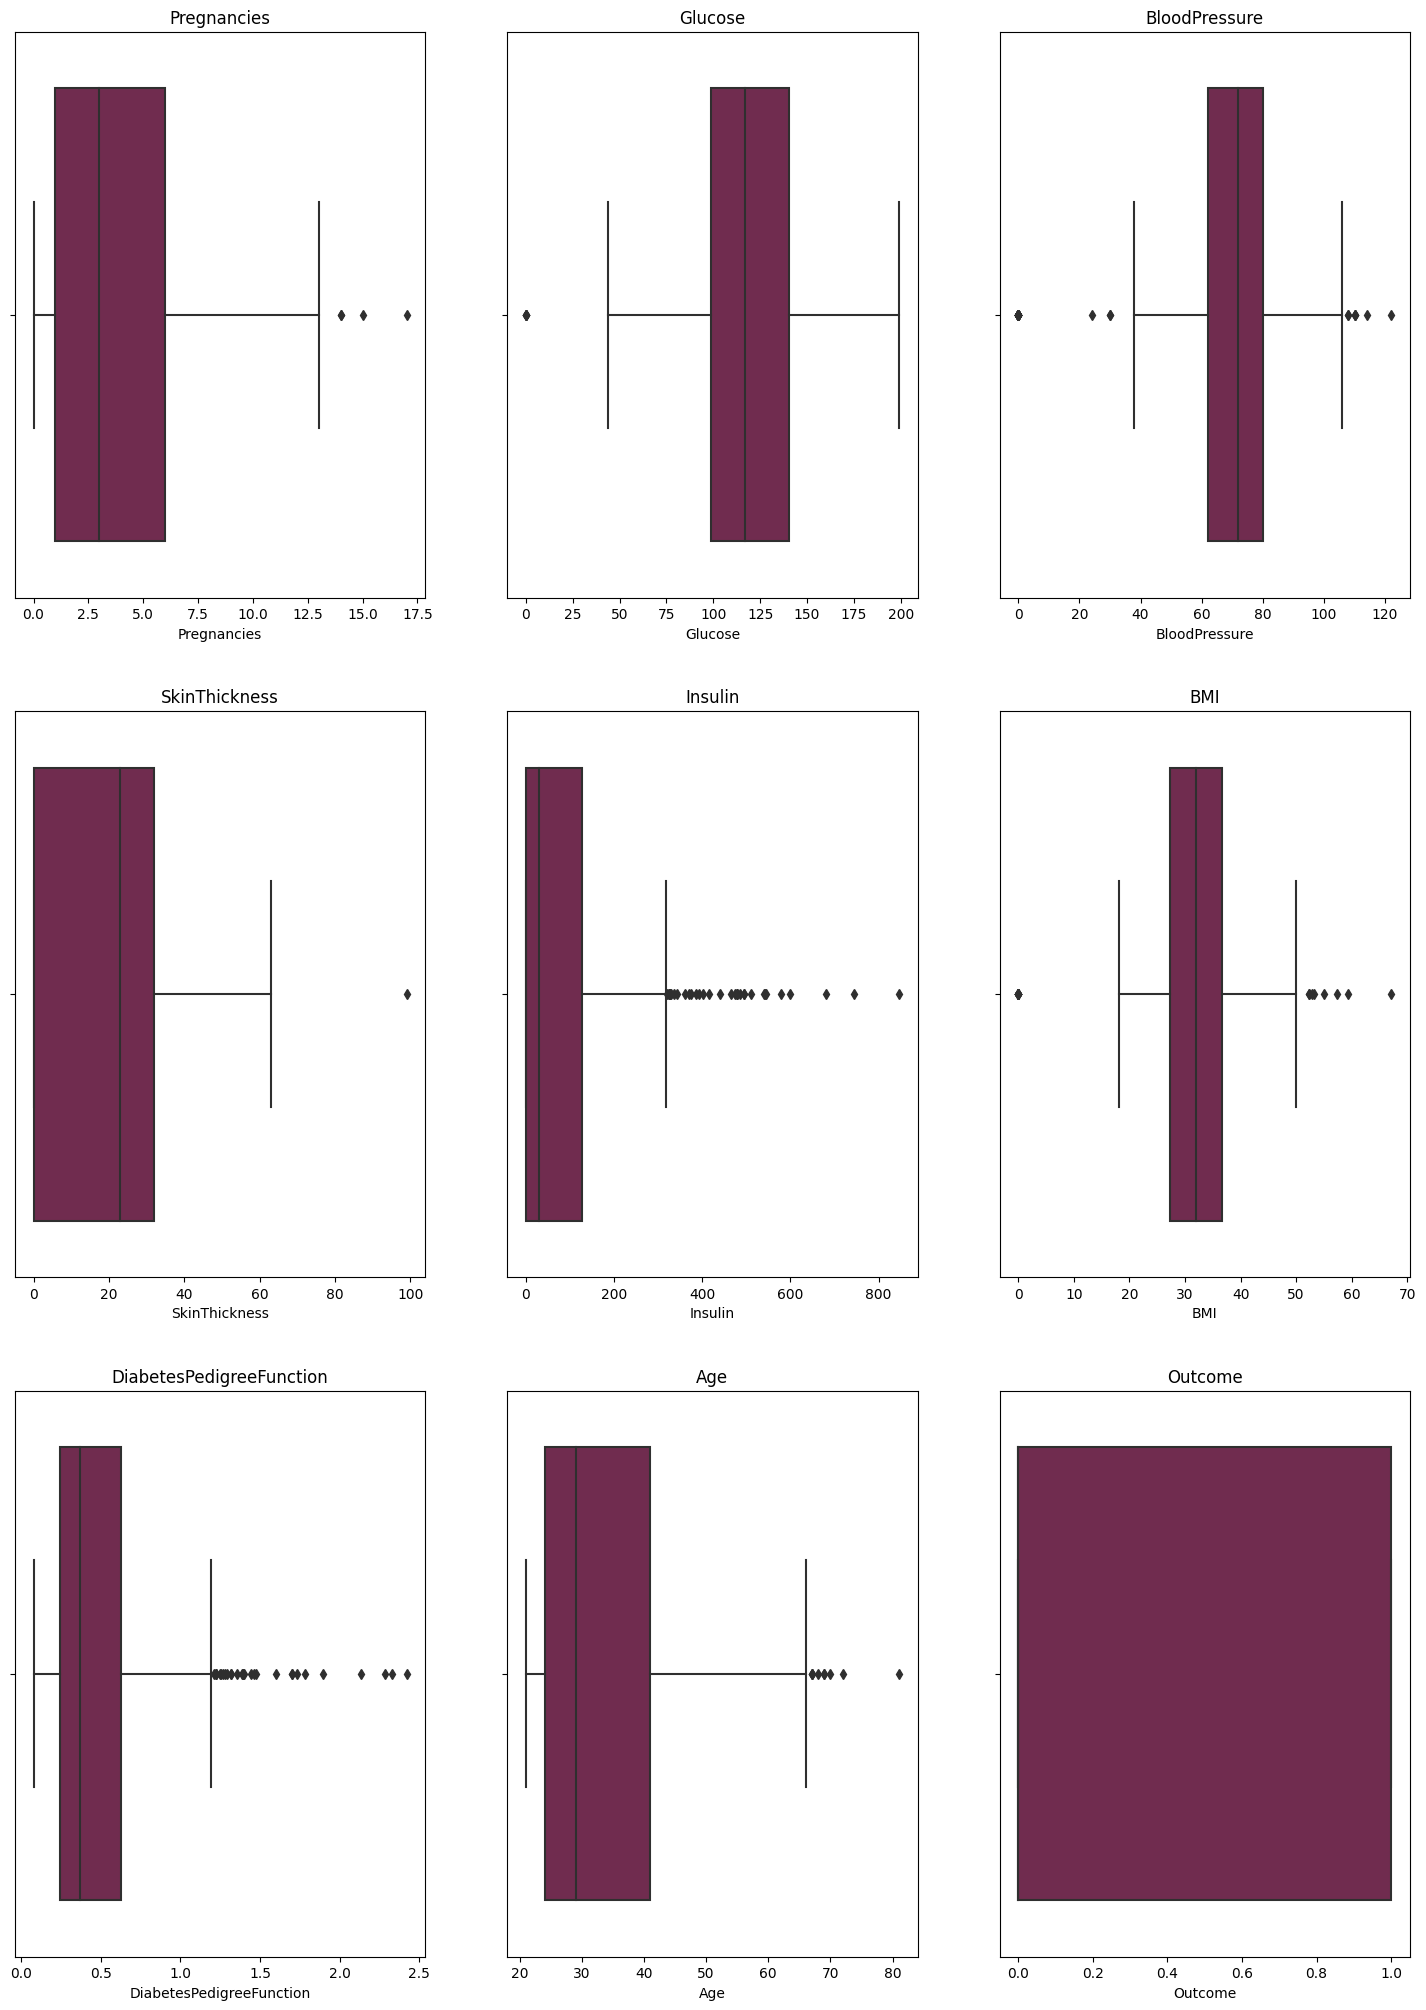

In [7]:
fig, ax = plt.subplots(3, 3,figsize=(18,25))
x=df.columns
idx=0
for i in range(3):
    for j in range(3):
        sns.boxplot(ax=ax[i, j], x=df[x[idx]]
                    ,color=(0.48366628618847957, 0.1286467902201389, 0.31317188565991266))
        ax[i, j].set_title(x[idx])
        idx=idx+1

> features are on different ranges so it requires scaling

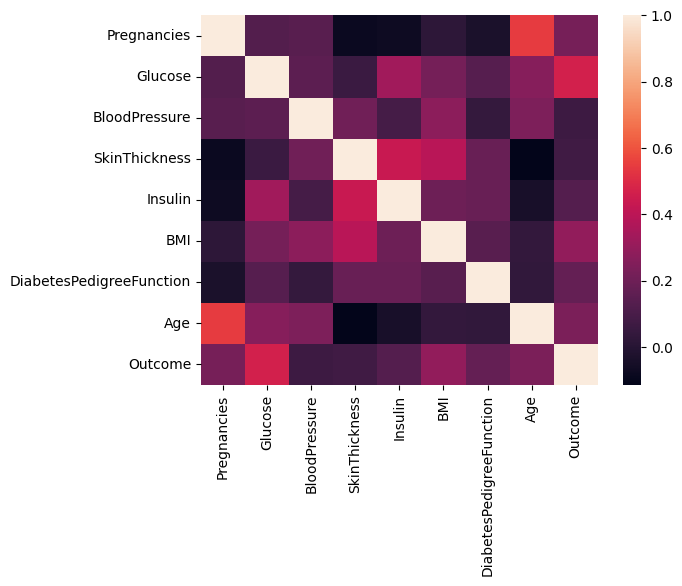

In [8]:
x=df.corr()
sns.heatmap(x)
plt.show()

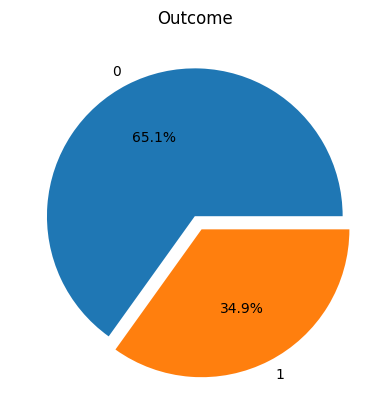

In [9]:
x=df['Outcome'].value_counts()
plt.pie(x,explode=[0, 0.1], autopct='%1.1f%%',labels=[0,1])
plt.title("Outcome")
plt.show()

In [10]:
x=df.columns
for col in x:
    num_zeros=df[col].eq(0).sum()
    print(num_zeros," in ",col)
    
    

111  in  Pregnancies
5  in  Glucose
35  in  BloodPressure
227  in  SkinThickness
374  in  Insulin
11  in  BMI
0  in  DiabetesPedigreeFunction
0  in  Age
500  in  Outcome


> there no NaN values in the database but there are zereos values which can be consideard as a type of missing values in this contest

In [11]:
def filling_zeroes(df, cols): 
    for col in cols:
        med = df.groupby('Outcome')[col].transform('median')
        zero_mask = df[col] == 0
        df.loc[zero_mask & (df['Outcome'] == 0), col] = med[zero_mask & (df['Outcome'] == 0)]
        df.loc[zero_mask & (df['Outcome'] == 1), col] = med[zero_mask & (df['Outcome'] == 1)]
    return df
df = filling_zeroes(df.copy(), df.columns[1:8])
df 

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29       39  26.6   
2              8      183             64             27        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27       39  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60             27        0  30.1   
767            1       93             70             31       39  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

# Modeling

In [12]:
featurs=df.drop('Outcome',axis=1)
target=df['Outcome']

In [13]:
stds=StandardScaler()
featurs=pd.DataFrame(stds.fit_transform(featurs),columns=df.columns[0:8]  )

In [14]:
x_train,x_test,y_train,y_test =train_test_split(featurs,target,test_size=0.20,random_state=4)

In [15]:
lr = LogisticRegression(random_state=42,max_iter=17000)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8051948051948052


# Playing With hyperparameters

In [16]:
def train_and_evaluate(C, solver):
    lr = LogisticRegression(C=C, solver=solver, random_state=42)
    lr.fit(x_train, y_train)

 
    y_pred = lr.predict(x_test)


    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


In [17]:
C_values = [0.00001,0.0001,0.001, 0.01, 0.1, 1, 10,100,1000,10000]
solver_options = ['lbfgs', 'newton-cg','sag','liblinear']

for C in C_values:
      for solver in solver_options:
        accuracy = train_and_evaluate(C, solver)
        print(f"C={C}  , solver='{solver}'    : Accuracy = {accuracy}")


C=1e-05  , solver='lbfgs'    : Accuracy = 0.6623376623376623
C=1e-05  , solver='newton-cg'    : Accuracy = 0.6623376623376623
C=1e-05  , solver='sag'    : Accuracy = 0.6623376623376623
C=1e-05  , solver='liblinear'    : Accuracy = 0.7272727272727273
C=0.0001  , solver='lbfgs'    : Accuracy = 0.6623376623376623
C=0.0001  , solver='newton-cg'    : Accuracy = 0.6623376623376623
C=0.0001  , solver='sag'    : Accuracy = 0.6623376623376623
C=0.0001  , solver='liblinear'    : Accuracy = 0.7272727272727273
C=0.001  , solver='lbfgs'    : Accuracy = 0.6558441558441559
C=0.001  , solver='newton-cg'    : Accuracy = 0.6558441558441559
C=0.001  , solver='sag'    : Accuracy = 0.6558441558441559
C=0.001  , solver='liblinear'    : Accuracy = 0.7337662337662337
C=0.01  , solver='lbfgs'    : Accuracy = 0.7922077922077922
C=0.01  , solver='newton-cg'    : Accuracy = 0.7922077922077922
C=0.01  , solver='sag'    : Accuracy = 0.7922077922077922
C=0.01  , solver='liblinear'    : Accuracy = 0.7662337662337663


In [18]:
rf=RandomForestClassifier()

In [19]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
rf.score(x_train,y_train)

1.0

In [21]:
rf_acc=rf.score(x_test,y_test)

In [22]:
clf = LogisticRegression(C=1.10, penalty='l1', solver='liblinear', random_state=42)
clf.fit(x_train, y_train)

LogisticRegression(C=1.1, penalty='l1', random_state=42, solver='liblinear')

In [23]:
y_pred2 = clf.predict(x_test)

In [24]:
lr_acc = accuracy_score(y_test, y_pred2)

In [25]:
arr=[rf_acc*100,lr_acc*100]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


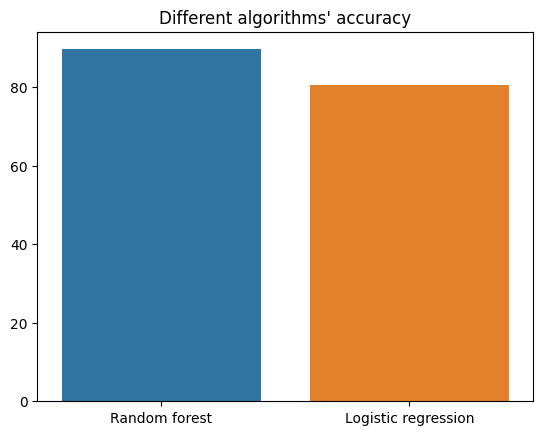

In [26]:
sns.barplot(y=arr,x=['Random forest','Logistic regression'])
plt.title("Different algorithms' accuracy")
plt.show()

# Doaa Helal